# Homework 2: Trees and Calibration


## Instructions

Please push the .ipynb, .py, and .pdf to Github Classroom prior to the deadline. Please include your UNI as well.

**Make sure to use the dataset that we provide in CourseWorks/Classroom. DO NOT download it from the link provided (It may be different).**

Due Date : 03/02 (2nd March), 11:59 PM EST

## Name: Chandan Suri

## UNI: CS4090

## The Dataset
Credit ([Link](https://www.kaggle.com/gamersclub/brazilian-csgo-plataform-dataset-by-gamers-club?select=tb_lobby_stats_player.csv) | [License](https://creativecommons.org/licenses/by-nc-sa/4.0/))

The goal is to predict wins based on in match performace of multiple players. Please use this dataset and this task for all parts of the assignment.

### Features

idLobbyGame - Categorical (The Lobby ID for the game)

idPlayer - Categorical (The ID of the player)

idRooom - Categorical (The ID of the room)

qtKill - Numerical (Number of kills)

qtAssist - Numerical (Number of Assists)

qtDeath - Numerical (Number of Deaths)

qtHs - Numerical (Number of kills by head shot)

qtBombeDefuse - Numerical (Number of Bombs Defuses)

qtBombePlant - Numerical (Number of Bomb plants)

qtTk - Numerical (Number of Team kills)

qtTkAssist - Numerical Number of team kills assists)

qt1Kill - Numerical (Number of rounds with one kill)

qt2Kill - Numerical (Number of rounds with two kill)

qt3Kill - Numerical (Number of rounds with three kill)

qt4Kill - Numerical (Number of rounds with four kill)

qt5Kill - Numerical (Number of rounds with five kill)

qtPlusKill - Numerical (Number of rounds with more than one kill)

qtFirstKill - Numerical (Number of rounds with first kill)

vlDamage - Numerical (Total match Damage)

qtHits - Numerical (Total match hits)

qtShots - Numerical (Total match shots)

qtLastAlive - Numerical (Number of rounds being last alive)

qtClutchWon - Numerical (Number of total clutchs wons)

qtRoundsPlayed - Numerical (Number of total Rounds Played)

descMapName - Categorical (Map Name - de_mirage, de_inferno, de_dust2, de_vertigo, de_overpass, de_nuke, de_train, de_ancient)

vlLevel - Numerical (GC Level)

qtSurvived - Numerical (Number of rounds survived)

qtTrade - Numerical (Number of trade kills)

qtFlashAssist - Numerical (Number of flashbang assists)

qtHitHeadshot - Numerical (Number of times the player hit headshot

qtHitChest - Numerical (Number of times the player hit chest)

qtHitStomach - Numerical (Number of times the player hit stomach)

qtHitLeftAtm - Numerical (Number of times the player hit left arm)

qtHitRightArm - Numerical (Number of times the player hit right arm)

qtHitLeftLeg - Numerical (Number of times the player hit left leg)

qtHitRightLeg - Numerical (Number of times the player hit right leg)

flWinner - Winner Flag (**Target Variable**).

dtCreatedAt - Date at which this current row was added. (Date)


In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer 
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

## Question 1: Decision Trees

**1.1: Load the provided dataset**

In [2]:
game_data = pd.read_csv("tb_lobby_stats_player.csv")
game_data.head()

,idLobbyGame,idPlayer,idRoom,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,...,qtFlashAssist,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg,flWinner,dtCreatedAt
0,1,1,1,5,1,16,2,0,0,0.0,...,0.0,3.0,13.0,4.0,2.0,2.0,1.0,0.0,0,2022-01-21 19:45:44
1,2,1,2,24,3,18,6,0,4,0.0,...,0.0,7.0,26.0,14.0,2.0,1.0,1.0,3.0,1,2022-02-04 02:09:47
2,3,2,3,6,4,23,2,0,1,0.0,...,0.0,3.0,15.0,8.0,1.0,2.0,0.0,2.0,0,2021-09-18 18:07:43
3,3,391,27508,10,5,20,4,1,0,0.0,...,0.0,6.0,27.0,10.0,1.0,7.0,6.0,6.0,1,2021-09-18 18:07:43
4,4,2,4,8,4,26,6,0,2,0.0,...,2.0,8.0,19.0,12.0,2.0,3.0,2.0,5.0,0,2021-09-27 00:17:45


**1.2: Plot % of missing values in each column. Would you consider dropping any columns? Assuming we want to train a decision tree, would you consider imputing the missing values? If not, why? (Remove the columns that you consider dropping - you must remove the dtCreatedAt column)**

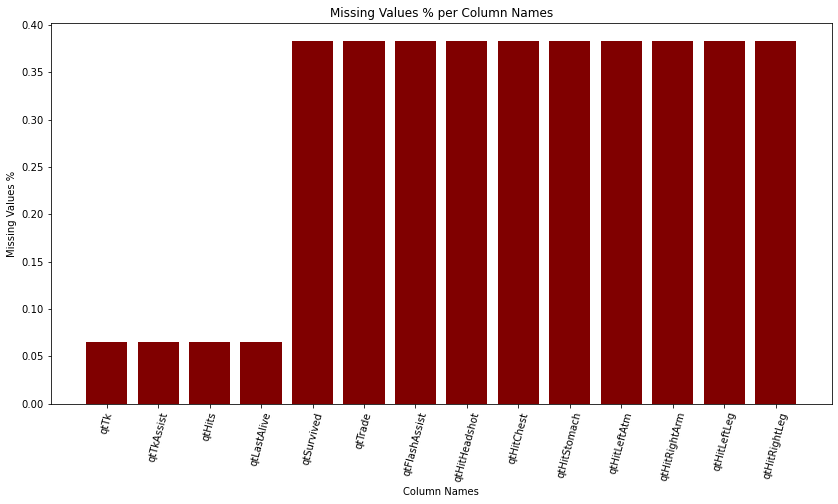

In [3]:
# Analyzing missing values data

'''
Returns the percentages of missing values in each of the columns in the dataset.
'''
def get_missing_value_percentages(data_df):
    col_missing_vals_percent_map = dict()
    num_rows = len(data_df)

    for col in data_df.columns:
        num_missing_vals_in_col = data_df[col].isnull().sum()
        if num_missing_vals_in_col > 0:
            col_missing_vals_percent_map[col] = (num_missing_vals_in_col/num_rows)*100.0
        
    return col_missing_vals_percent_map

'''
Plots a bar chart for the missing values percentage present in the dataset.
'''
def plot_percent_missing_vals(col_missing_vals_percent_map):
    fig = plt.figure(figsize = (14, 7))
    column_names = list(col_missing_vals_percent_map.keys())
    percent_missing_vals = list(col_missing_vals_percent_map.values())
    plt.bar(column_names, percent_missing_vals, color ='maroon')
 
    plt.xlabel("Column Names")
    plt.ylabel("Missing Values %")
    plt.title("Missing Values % per Column Names")
    plt.xticks(rotation = 75)
    plt.show()
    
col_missing_vals_percent_map = get_missing_value_percentages(game_data)
plot_percent_missing_vals(col_missing_vals_percent_map)

In [4]:
# Remove Columns

# Remove dtCreated Column by default (most probably because it won't affect the target much,
# because of no/significant corelation)
game_data.drop(["dtCreatedAt"], inplace = True, axis = 1)

In [5]:
categorical_features = ["idLobbyGame", "idPlayer", "idRoom", "descMapName"]
categories_count_map = dict()
for categorical_feature in categorical_features:
    categories_count = game_data[categorical_feature].nunique()
    categories_count_map[categorical_feature] = categories_count

for feature_name, categories_num in categories_count_map.items():
    print(f"{feature_name} : {categories_num}")

idLobbyGame : 172911
idPlayer : 2469
idRoom : 178500
descMapName : 8


In [6]:
categorical_features_to_drop = ["idLobbyGame", "idPlayer", "idRoom"]
game_data.drop(categorical_features_to_drop, inplace = True, axis = 1)

In [7]:
game_data.dropna(subset = list(col_missing_vals_percent_map.keys()), how="any", inplace=True)

In [8]:
# Looking at the data after removing the columns
game_data

,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,qtTkAssist,qt1Kill,qt2Kill,...,qtTrade,qtFlashAssist,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg,flWinner
0,5,1,16,2,0,0,0.0,0.0,3,1,...,2.0,0.0,3.0,13.0,4.0,2.0,2.0,1.0,0.0,0
1,24,3,18,6,0,4,0.0,1.0,9,4,...,1.0,0.0,7.0,26.0,14.0,2.0,1.0,1.0,3.0,1
2,6,4,23,2,0,1,0.0,1.0,4,1,...,3.0,0.0,3.0,15.0,8.0,1.0,2.0,0.0,2.0,0
3,10,5,20,4,1,0,0.0,0.0,6,2,...,4.0,0.0,6.0,27.0,10.0,1.0,7.0,6.0,6.0,1
4,8,4,26,6,0,2,0.0,0.0,4,2,...,4.0,2.0,8.0,19.0,12.0,2.0,3.0,2.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184147,21,3,13,5,1,1,0.0,0.0,8,5,...,0.0,0.0,7.0,42.0,26.0,1.0,4.0,6.0,2.0,1
184148,15,1,22,5,0,1,0.0,0.0,11,2,...,5.0,0.0,5.0,21.0,21.0,3.0,7.0,2.0,4.0,1
184149,9,6,23,2,0,3,0.0,0.0,9,0,...,2.0,0.0,3.0,25.0,12.0,1.0,5.0,6.0,7.0,0
184150,15,5,20,6,0,2,0.0,0.0,13,1,...,3.0,1.0,8.0,22.0,16.0,2.0,8.0,3.0,6.0,0


**1.3: Plot side-by-siide bars of class distribtuion for each category for the categorical feature and the target categories.**

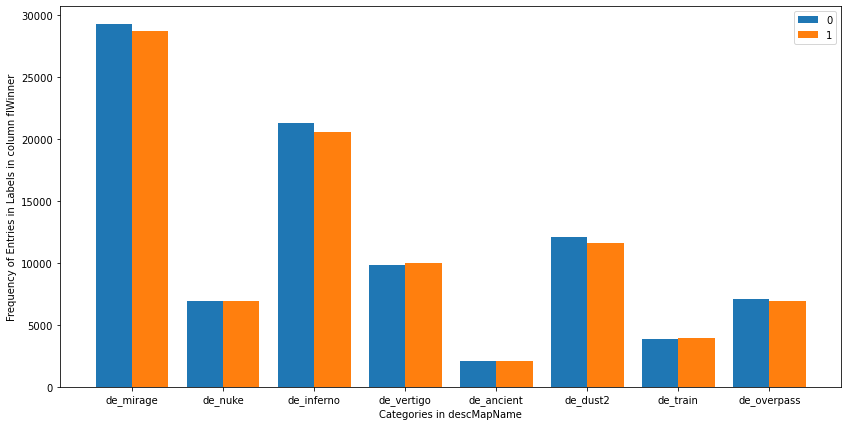

In [9]:
# Getting columns in different buckets
categorical_feature = "descMapName"
target_feature_name = "flWinner"
numerical_features = list(set(game_data.columns) - set([categorical_feature, target_feature_name]))

# As first 3 categorical features above are IDs, we only consider the "descMapName" here to visualize
data_per_category_label = game_data[[categorical_feature, target_feature_name]].value_counts()
categories_in_feature = list(game_data[categorical_feature].unique())
categories_in_label = list(game_data[target_feature_name].unique())

def plot_chart_distribution(data_per_category_label, categories_in_feature, categories_in_label):
    x_axis_data = np.arange(len(categories_in_feature))
    labels_data = defaultdict(list)
    
    for category in categories_in_feature:
        for label in categories_in_label:
            if label not in labels_data:
                labels_data[label] = list()
            labels_data[label].append(data_per_category_label[category][label])
    
    fig = plt.figure(figsize = (14, 7))
    sign = -1
    for label, label_data in labels_data.items():
        plt.bar(x_axis_data + sign * 0.2, labels_data[label], width = 0.4, label = label)
        sign *= -1
        
    plt.xticks(x_axis_data, categories_in_feature)
    plt.xlabel(f"Categories in {categorical_feature}")
    plt.ylabel(f"Frequency of Entries in Labels in column {target_feature_name}")
    plt.legend()
    plt.show()

plot_chart_distribution(data_per_category_label, categories_in_feature, categories_in_label)

**1.4: Split the data into development and test datasets. Which splitting methodology did you choose and why?**

In [10]:
# Firstly I separate the labels from the feature wise data
labels_data = game_data[target_feature_name]
X_data = game_data.drop([target_feature_name], axis = 1)

In [11]:
# Analyzing the labels frequency
game_data[target_feature_name].value_counts()

0    92586
1    90861
Name: flWinner, dtype: int64

In [12]:
# Now I split the data using random splitting
X_dev, X_test, y_dev, y_test = train_test_split(X_data, labels_data, test_size = 0.2)

**1.5: Preprocess the data (Handle the Categorical Variable). Do we need to apply scaling? Briefly Justify**

In [13]:
X_dev = pd.get_dummies(X_dev, columns = [categorical_feature])
print(f"Dev DataSet Size: {X_dev.shape}")
X_dev

Dev DataSet Size: (146757, 40)


,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,qtTkAssist,qt1Kill,qt2Kill,...,qtHitLeftLeg,qtHitRightLeg,descMapName_de_ancient,descMapName_de_dust2,descMapName_de_inferno,descMapName_de_mirage,descMapName_de_nuke,descMapName_de_overpass,descMapName_de_train,descMapName_de_vertigo
96297,18,4,24,5,0,0,0.0,0.0,6,3,...,9.0,3.0,0,0,0,0,0,0,0,1
73376,23,4,21,13,0,2,0.0,1.0,5,6,...,0.0,1.0,0,0,1,0,0,0,0,0
133326,19,7,22,8,0,1,0.0,0.0,4,6,...,2.0,7.0,0,0,0,1,0,0,0,0
90401,20,4,24,2,0,5,0.0,0.0,12,1,...,7.0,9.0,0,0,0,0,1,0,0,0
173880,25,3,15,12,0,1,0.0,1.0,7,6,...,1.0,0.0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14218,15,8,9,7,0,5,0.0,1.0,5,3,...,0.0,3.0,0,0,0,0,0,0,0,1
84418,29,7,25,10,1,1,0.0,0.0,7,4,...,6.0,9.0,0,0,0,1,0,0,0,0
153959,18,3,22,7,0,0,1.0,0.0,6,3,...,0.0,6.0,0,0,1,0,0,0,0,0
77497,6,2,14,2,0,2,0.0,2.0,6,0,...,3.0,4.0,0,0,0,1,0,0,0,0


In [14]:
X_test = pd.get_dummies(X_test, columns = [categorical_feature])
print(f"Test DataSet Size: {X_test.shape}")
X_test

Test DataSet Size: (36690, 40)


,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,qtTkAssist,qt1Kill,qt2Kill,...,qtHitLeftLeg,qtHitRightLeg,descMapName_de_ancient,descMapName_de_dust2,descMapName_de_inferno,descMapName_de_mirage,descMapName_de_nuke,descMapName_de_overpass,descMapName_de_train,descMapName_de_vertigo
13267,18,2,15,12,0,1,0.0,0.0,8,2,...,1.0,1.0,0,0,0,1,0,0,0,0
67010,28,4,28,6,0,0,0.0,0.0,10,4,...,4.0,15.0,0,0,0,1,0,0,0,0
75290,21,4,19,5,2,0,0.0,0.0,10,3,...,2.0,3.0,0,0,0,0,1,0,0,0
125148,12,4,22,4,0,1,0.0,0.0,6,3,...,8.0,9.0,0,0,1,0,0,0,0,0
152567,23,2,12,9,0,0,0.0,0.0,9,4,...,3.0,2.0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73808,25,7,12,10,1,4,0.0,0.0,10,4,...,5.0,6.0,0,1,0,0,0,0,0,0
70809,24,5,17,3,1,0,0.0,0.0,7,4,...,1.0,3.0,0,0,0,0,1,0,0,0
96149,32,5,20,13,1,2,0.0,0.0,8,5,...,1.0,4.0,0,0,0,1,0,0,0,0
60603,17,5,17,5,0,2,0.0,0.0,10,2,...,1.0,5.0,0,0,0,0,0,0,0,1


In [15]:
categorical_features = list(set(X_dev.columns) - set(numerical_features))
std_scaler = StandardScaler()

# Dev data Rescaling
X_dev_scaled = pd.DataFrame(std_scaler.fit_transform(X_dev[numerical_features]), columns = numerical_features)
X_dev_scaled.reset_index(drop = True, inplace = True)
X_dev_scaled = pd.concat([X_dev_scaled, X_dev[categorical_features].reset_index(drop = True)], axis = 1)

# Test data Rescaling
X_test_scaled = pd.DataFrame(std_scaler.fit_transform(X_test[numerical_features]), columns = numerical_features)
X_test_scaled.reset_index(drop = True, inplace = True)
X_test_scaled = pd.concat([X_test_scaled, X_test[categorical_features].reset_index(drop = True)], axis = 1)

**1.6: Fit a Decision Tree on the development data until all leaves are pure. What is the performance of the tree on the development set and test set? Provide metrics you believe are relevant and briefly justify.**

In [16]:
dec_tree_clf = DecisionTreeClassifier(criterion = "entropy", random_state = 2102)
dec_tree_clf.fit(X_dev_scaled, y_dev)

print(f"Score on Dev Data: {dec_tree_clf.score(X_dev_scaled, y_dev)}")
print(f"Score on Test Data: {dec_tree_clf.score(X_test_scaled, y_test)}")

Score on Dev Data: 1.0
Score on Test Data: 0.7313436903788498


**1.7: Visualize the trained tree until the max_depth 8**

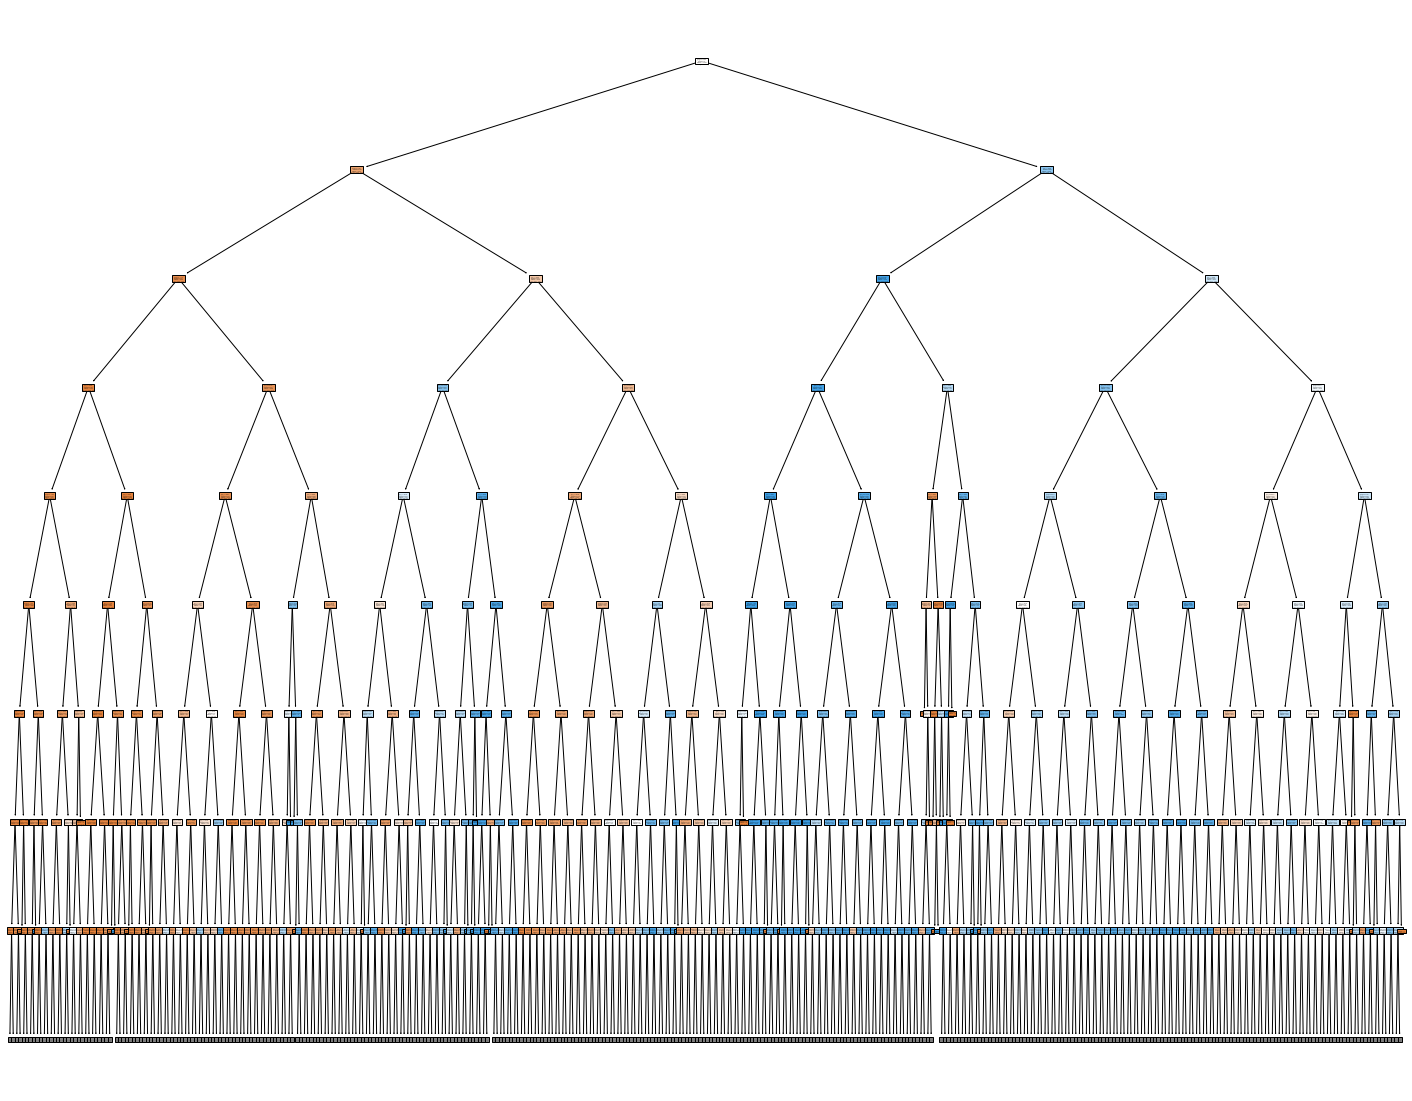

In [17]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dec_tree_clf, max_depth = 8, filled = True)
fig.savefig("decision_tree_non_pruned_depth_8.png")

**1.8: Prune the tree using one of the techniques discussed in class and evaluate the performance**

In [18]:
# I will try and perform a post-pruning technique - Cost Complexity Prunning which is based on an alpha parameter
# Training the model and getting the range of alpha values and impurities
dec_tree_clf = DecisionTreeClassifier(criterion = "entropy", random_state = 2102)
dec_tree_clf.fit(X_dev_scaled, y_dev)

path = dec_tree_clf.cost_complexity_pruning_path(X_dev_scaled, y_dev)
print(f"The values of alpha and impurities are shown below:")
print(path)

print(f"The number of alpha values: {len(path['ccp_alphas'])}")
print(f"The numner of impurities' values: {len(path['impurities'])}")

The values of alpha and impurities are shown below:
{'ccp_alphas': array([0.00000000e+00, 1.22980181e-05, 1.22980181e-05, ...,
       3.46130166e-02, 7.96295337e-02, 1.82555791e-01]), 'impurities': array([0.00000000e+00, 2.45960361e-05, 4.91920723e-05, ...,
       7.37751353e-01, 8.17380887e-01, 9.99936677e-01])}
The number of alpha values: 8637
The numner of impurities' values: 8637


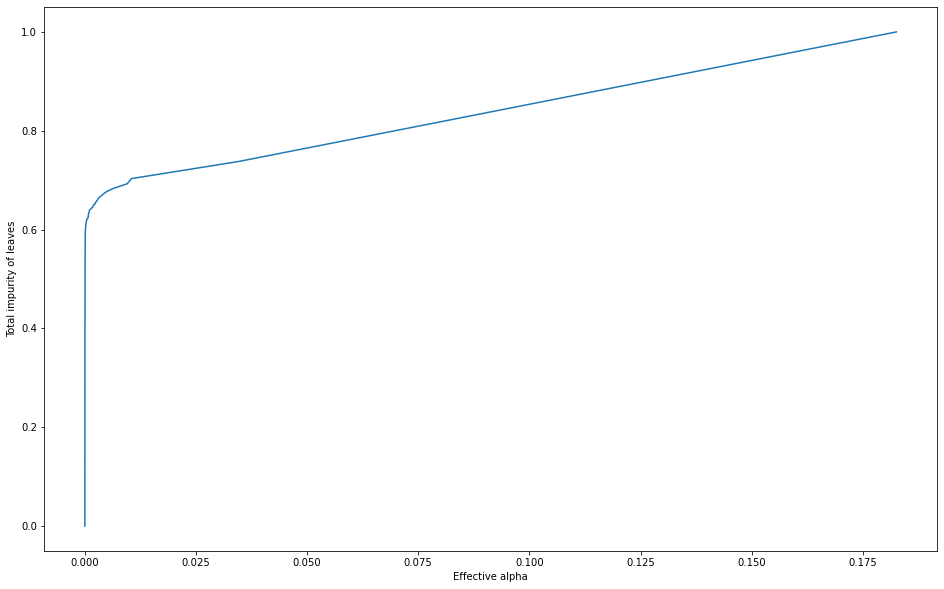

In [19]:
# Let's visualize the relationship between alphas between impurities
fig = plt.figure(figsize=(16,10))
ccp_alphas, impurities = path.ccp_alphas, path.impurities
plt.plot(ccp_alphas, impurities)
plt.xlabel("Effective alpha")
plt.ylabel("Total impurity of leaves")
plt.show()

In [20]:
# Now, we will find the optimal value of alpha (this will help us prune our tree)
# I will only be taking the last 100 alpha values into consideration due to the computational time
classifiers = []

for idx, ccp_alpha in enumerate(ccp_alphas[-101:-1]):
    print(f"At the {idx} : Running for Alpha Value: {ccp_alpha}")
    dec_tree_clf = DecisionTreeClassifier(criterion = "entropy", ccp_alpha = ccp_alpha, random_state = 2102)
    dec_tree_clf.fit(X_dev_scaled, y_dev)
    classifiers.append(dec_tree_clf)
    
print(f"Number of classifier trained: {len(classifiers)}")

At the 0 : Running for Alpha Value: 0.00016337090445708857
At the 1 : Running for Alpha Value: 0.00017332738895944888
At the 2 : Running for Alpha Value: 0.00017414498083759625
At the 3 : Running for Alpha Value: 0.00017424791756476612
At the 4 : Running for Alpha Value: 0.00017708715435341138
At the 5 : Running for Alpha Value: 0.00017718277631010746
At the 6 : Running for Alpha Value: 0.0001816214422440711
At the 7 : Running for Alpha Value: 0.00018389014155218916
At the 8 : Running for Alpha Value: 0.00018629622930760228
At the 9 : Running for Alpha Value: 0.0001875012090773549
At the 10 : Running for Alpha Value: 0.00018837090704216814
At the 11 : Running for Alpha Value: 0.00018872651668267598
At the 12 : Running for Alpha Value: 0.0001895576055248975
At the 13 : Running for Alpha Value: 0.00019020111458813637
At the 14 : Running for Alpha Value: 0.00019046870092048404
At the 15 : Running for Alpha Value: 0.0001906279784640117
At the 16 : Running for Alpha Value: 0.000191211786972

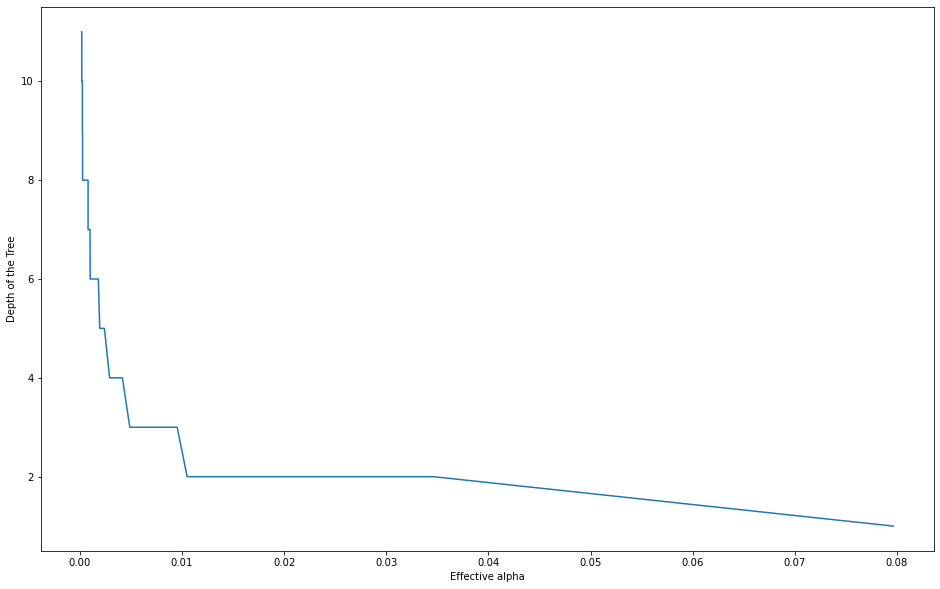

In [21]:
# Finding relationship between tree depth and alpha
tree_depths = [classifier.tree_.max_depth for classifier in classifiers]
fig = plt.figure(figsize=(16,10))
plt.plot(ccp_alphas[-101:-1], tree_depths)
plt.xlabel("Effective alpha")
plt.ylabel("Depth of the Tree")
plt.show()

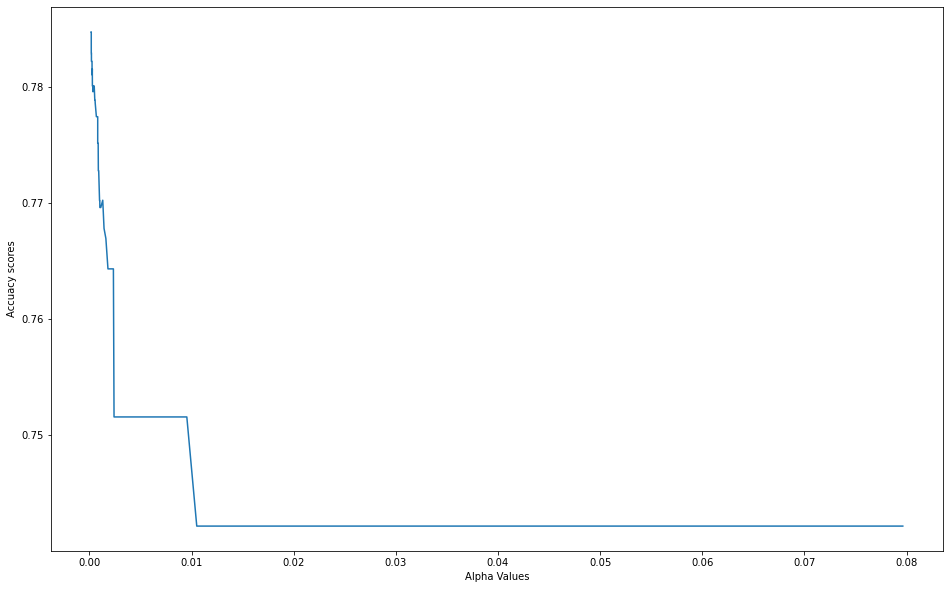

In [22]:
# Finding relationship between alpha and accuracy
acc_scores = [accuracy_score(y_test, classifer.predict(X_test_scaled)) for classifer in classifiers]
fig = plt.figure(figsize=(16,10))
plt.plot(ccp_alphas[-101:-1], acc_scores)
plt.xlabel("Alpha Values")
plt.ylabel("Accuacy scores")
plt.show()

In [23]:
# Now let's get the exact value of alpha at which we get the best accuracy
best_ccp_alpha = float("-inf")
best_max_depth = float("-inf")
highest_score = float("-inf")
for ccp_alpha, max_depth, score in zip(ccp_alphas[-101:-1], tree_depths, acc_scores):
    if score > highest_score:
        best_ccp_alpha = ccp_alpha
        best_max_depth = max_depth
        highest_score = score
        
print(f"I get the highest score {highest_score} at Max depth: {best_max_depth} and Alpha value: {best_ccp_alpha}")

I get the highest score 0.7847097301717089 at Max depth: 11 and Alpha value: 0.00016337090445708857


In [25]:
# Now we will apply the optimal max depth and alpha 
# on the decision tree classifier in order to get the pruned tree.
dec_tree_clf_pruned = DecisionTreeClassifier(criterion = "entropy", \
                                             max_depth = best_max_depth, \
                                             ccp_alpha = best_ccp_alpha, \
                                             random_state = 2102)
dec_tree_clf_pruned.fit(X_dev_scaled, y_dev)

print(f"Score on Dev Data: {dec_tree_clf_pruned.score(X_dev_scaled, y_dev)}")
print(f"Score on Test Data: {dec_tree_clf_pruned.score(X_test_scaled, y_test)}")

Score on Dev Data: 0.7848552368881894
Score on Test Data: 0.7847097301717089


**1.9: List the top 3 most important features for this trained tree? How would you justify these features being the most important?**

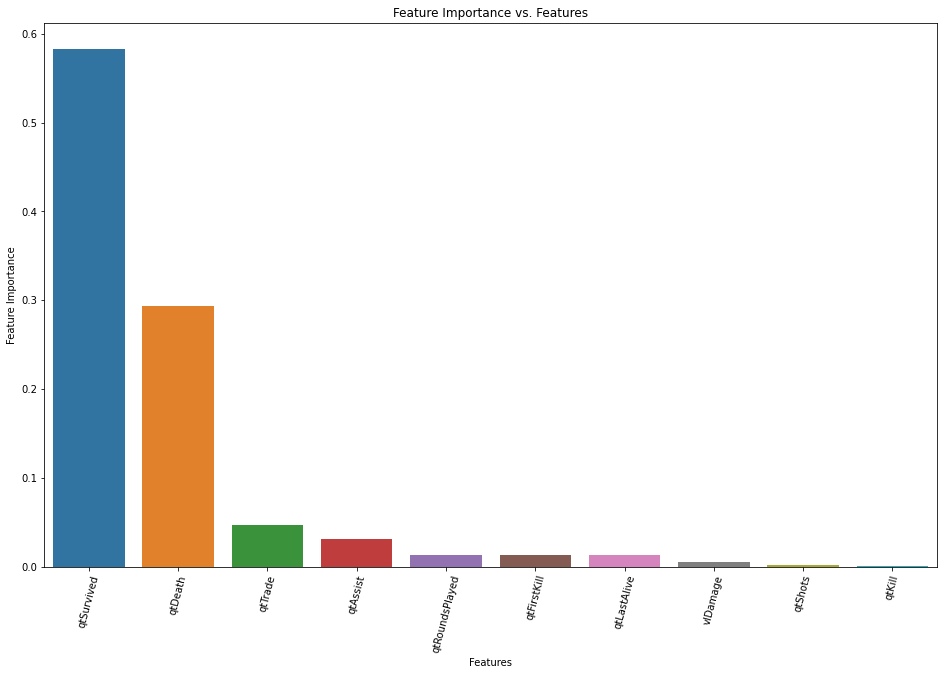

In [34]:
import warnings
warnings.filterwarnings("ignore")

feature_names = list(X_dev_scaled.columns)
feature_importances = dec_tree_clf_pruned.feature_importances_
feature_importances_map = zip(feature_names, feature_importances)
sorted_feat_names, sorted_feat_importances = zip(*(sorted(list\
                                                    (filter(lambda x: x[1] != 0, feature_importances_map)),\
                                                    key = lambda x: x[1], reverse = True)))

fig = plt.figure(figsize=(16,10))
ax = sns.barplot(list(sorted_feat_names), list(sorted_feat_importances))
ax.set_xlabel("Features")
ax.set_ylabel("Feature Importance")
ax.set_title("Feature Importance vs. Features")
ax.tick_params(axis = 'x', rotation = 75)

The top 3 most important features are as follows as shown above:
1. qtSurvived
2. dtDeath
3. qtTrade

Reason:

## Question 2: Random Forests

In [41]:
# Additional Imports for this section
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

**2.1: Train a Random Forest model on the development dataset using RandomForestClassifier class in sklearn. Use the default parameters. Evaluate the performance of the model on test dataset. Does this perform better than Decision Tree on the test dataset (compare to results in Q 1.6)?**

In [42]:
random_forest_classifier = RandomForestClassifier(random_state = 2102)
random_forest_classifier.fit(X_dev_scaled, y_dev)

print("For Random Forest Classifier: ")
print(f"Score on Dev Data: {random_forest_classifier.score(X_dev_scaled, y_dev)}")
print(f"Score on Test Data: {random_forest_classifier.score(X_test_scaled, y_test)}")

For Random Forest Classifier: 
Score on Dev Data: 0.9999931860149771
Score on Test Data: 0.7913600436086127


Performance Comparison:

**2.2: Does all trees in the trained random forest model have pure leaves? How would you verify this?**

In [43]:
total_num_leaves = 0
total_num_pure_leaves = 0
total_num_impure_leaves = 0

for estimator_idx, estimator in enumerate(random_forest_classifier.estimators_):
    num_leaves = 0
    num_pure_leaves = 0
    tree = estimator.tree_
    num_nodes = tree.node_count
    impurities = tree.impurity
    
    for node_idx in range(num_nodes):
        if tree.children_left[node_idx] != -1 or tree.children_right[node_idx] != -1:
            continue
        num_leaves += 1
        if impurities[node_idx] == 0:
            num_pure_leaves += 1
    
    num_impure_leaves = num_leaves - num_pure_leaves
    total_num_leaves += num_leaves
    total_num_pure_leaves += num_pure_leaves
    total_num_impure_leaves += num_impure_leaves
    
    print(f"For estimator {estimator_idx}:")
    print(f"#Leaves: {num_leaves}, #Pure Leaves: {num_pure_leaves}, #Impure Leaves: {num_impure_leaves}")
    
print("\n")
print(f"For all the estimators:")
print(f"#Leaves: {total_num_leaves}")
print(f"#Pure Leaves: {total_num_pure_leaves}, #Impure Leaves: {total_num_impure_leaves}")

For estimator 0:
#Leaves: 20185, #Pure Leaves: 20185, #Impure Leaves: 0
For estimator 1:
#Leaves: 20520, #Pure Leaves: 20520, #Impure Leaves: 0
For estimator 2:
#Leaves: 20223, #Pure Leaves: 20223, #Impure Leaves: 0
For estimator 3:
#Leaves: 19937, #Pure Leaves: 19937, #Impure Leaves: 0
For estimator 4:
#Leaves: 20700, #Pure Leaves: 20700, #Impure Leaves: 0
For estimator 5:
#Leaves: 20424, #Pure Leaves: 20424, #Impure Leaves: 0
For estimator 6:
#Leaves: 20288, #Pure Leaves: 20288, #Impure Leaves: 0
For estimator 7:
#Leaves: 19892, #Pure Leaves: 19892, #Impure Leaves: 0
For estimator 8:
#Leaves: 20519, #Pure Leaves: 20519, #Impure Leaves: 0
For estimator 9:
#Leaves: 20543, #Pure Leaves: 20543, #Impure Leaves: 0
For estimator 10:
#Leaves: 20392, #Pure Leaves: 20392, #Impure Leaves: 0
For estimator 11:
#Leaves: 19596, #Pure Leaves: 19596, #Impure Leaves: 0
For estimator 12:
#Leaves: 20024, #Pure Leaves: 20024, #Impure Leaves: 0
For estimator 13:
#Leaves: 20026, #Pure Leaves: 20026, #Impur

**2.3: Assume you want to improve the performance of this model. Also, assume that you had to pick two hyperparameters that you could tune to improve its performance. Which hyperparameters would you choose and why?**


**2.4: Now, assume you had to choose up to 5 different values (each) for these two hyperparameters. How would you choose these values that could potentially give you a performance lift?**

**2.5: Perform model selection using the chosen values for the hyperparameters. Use cross-validation for finding the optimal hyperparameters. Report on the optimal hyperparameters. Estimate the performance of the optimal model (model trained with optimal hyperparameters) on test dataset? Has the performance improved over your plain-vanilla random forest model trained in Q2.1?**

In [44]:
param_grid = {
    "bootstrap": [True],
    "warm_start": [True],
    "max_depth": [5, 7, 9, 11, 13],
    "n_estimators": [50, 100, 150, 200, 250]
}

pipe = make_pipeline(GridSearchCV(RandomForestClassifier(oob_score = True, random_state = 2102), \
                                  param_grid = param_grid, \
                                  cv = 5,
                                  return_train_score = True))
pipe.fit(X_dev_scaled, y_dev)

grid_search_results = pipe.named_steps["gridsearchcv"]
grid_search_result_max_depth = grid_search_results.best_params_['max_depth']
grid_search_result_n_estimators = grid_search_results.best_params_['n_estimators']

print(f"Best value of hyperparameter max_depth is: {grid_search_result_max_depth}")
print(f"Best value of hyperparameter n_estimators is: {grid_search_result_n_estimators}")
print(f"Best Accuracy Score: {grid_search_results.best_score_}")
print(f"Accuracy Score for Testing Data: {pipe.score(X_test_scaled, y_test) * 100}")

Best value of hyperparameter max_depth is: 13
Best value of hyperparameter n_estimators is: 150
Best Accuracy Score: 0.7889981167319728
Accuracy Score for Testing Data: 78.98064867811392


In [53]:
random_forest_tuned_clf = RandomForestClassifier(oob_score = True, bootstrap = True, \
                                           warm_start = True, max_depth = 13, \
                                           n_estimators = 150,random_state = 2102)
random_forest_tuned_clf.fit(X_dev_scaled, y_dev)

print(f"Accuracy Score for Dev Data: {random_forest_tuned_clf.score(X_dev_scaled, y_dev) * 100}")
print(f"Accuracy Score for Testing Data: {random_forest_tuned_clf.score(X_test_scaled, y_test) * 100}")

Accuracy Score for Dev Data: 84.45730016285424
Accuracy Score for Testing Data: 78.98064867811392


**2.6: Can you find the top 3 most important features from the model trained in Q2.5? How do these features compare to the important features that you found from Q1.9? If they differ, which feature set makes more sense?**

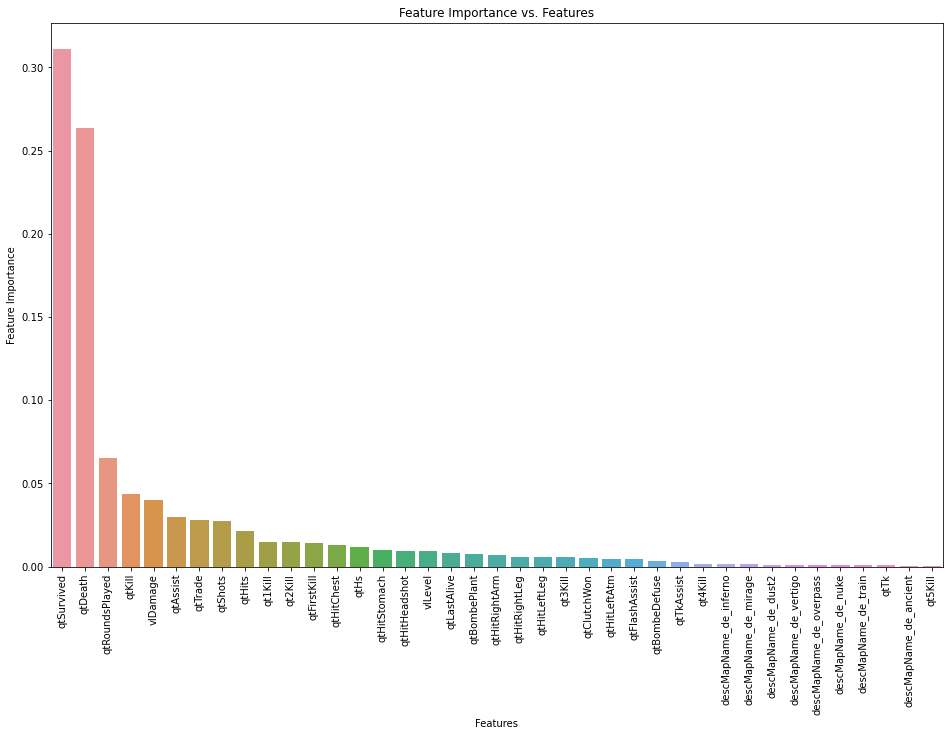

In [55]:
import warnings
warnings.filterwarnings("ignore")

feature_names = list(X_dev_scaled.columns)
feature_importances = random_forest_tuned_clf.feature_importances_
feature_importances_map = zip(feature_names, feature_importances)
sorted_feat_names, sorted_feat_importances = zip(*(sorted(list\
                                                    (filter(lambda x: x[1] != 0, feature_importances_map)),\
                                                    key = lambda x: x[1], reverse = True)))

fig = plt.figure(figsize=(16,10))
ax = sns.barplot(list(sorted_feat_names), list(sorted_feat_importances))
ax.set_xlabel("Features")
ax.set_ylabel("Feature Importance")
ax.set_title("Feature Importance vs. Features")
ax.tick_params(axis = 'x', rotation = 90)

## Question 3: Gradient Boosted Trees

In [59]:
# Additional Imports for this section
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
import time

**3.1: Choose three hyperparameters to tune GradientBoostingClassifier and HistGradientBoostingClassifier on the development dataset using 5-fold cross validation. Report on the time taken to do model selection for both the models. Also, report the performance of the test dataset from the optimal models.**

In [60]:
# Gradient Boosting Classifier

# Setting the grid for hyperparameter tuning for GridSearchCV
param_grid = {
    'learning_rate': [0.5, 0.1, 0.05, 0.01, 0.001],
    'max_depth': [5, 7, 9, 11, 13],
    'n_estimators': [50, 100, 150, 200, 250]
}

pipe = make_pipeline(GridSearchCV(GradientBoostingClassifier(random_state = 2102), \
                                  param_grid = param_grid, \
                                  cv = 5,
                                  return_train_score = True))

print("For Gradient Boosting Classifier:")
begin_time = time.time()
pipe.fit(X_dev_scaled, y_dev)
end_time = time.time()
print(f"Total time taken for model selection and training the model is: {(end_time - begin_time)/60} minutes.")

grid_search_results = pipe.named_steps["gridsearchcv"]
grid_search_result_lr = grid_search_results.best_params_['learning_rate']
grid_search_result_max_depth = grid_search_results.best_params_['max_depth']
grid_search_result_n_estimators = grid_search_results.best_params_['n_estimators']

print(f"Best value of hyperparameter learning_rate is: {grid_search_result_lr}")
print(f"Best value of hyperparameter max_depth is: {grid_search_result_max_depth}")
print(f"Best value of hyperparameter n_estimators is: {grid_search_result_n_estimators}")
print(f"Best Accuracy Score: {grid_search_results.best_score_}")
print(f"Accuracy Score for Testing Data: {pipe.score(X_test_scaled, y_test) * 100}")

For Gradient Boosting Classifier:


KeyboardInterrupt: 

In [ ]:
# Hist Gradient Boosting Classifier

# Setting the grid for hyperparameter tuning for GridSearchCV
param_grid = {
    'learning_rate': [0.5, 0.1, 0.05, 0.01, 0.001],
    'max_depth': [5, 7, 9, 11, 13],
    'n_estimators': [50, 100, 150, 200, 250]
}

pipe = make_pipeline(GridSearchCV(HistGradientBoostingClassifier(random_state = 2102), \
                                  param_grid = param_grid, \
                                  cv = 5,
                                  return_train_score = True))

print("For Hist Gradient Boosting Classifier:")
begin_time = time.time()
pipe.fit(X_dev_scaled, y_dev)
end_time = time.time()
print(f"Total time taken for model selection and training the model is: {(end_time - begin_time)/60} minutes.")

grid_search_results = pipe.named_steps["gridsearchcv"]
grid_search_result_lr = grid_search_results.best_params_['learning_rate']
grid_search_result_max_depth = grid_search_results.best_params_['max_depth']
grid_search_result_n_estimators = grid_search_results.best_params_['n_estimators']

print(f"Best value of hyperparameter learning_rate is: {grid_search_result_lr}")
print(f"Best value of hyperparameter max_depth is: {grid_search_result_max_depth}")
print(f"Best value of hyperparameter n_estimators is: {grid_search_result_n_estimators}")
print(f"Best Accuracy Score: {grid_search_results.best_score_}")
print(f"Accuracy Score for Testing Data: {pipe.score(X_test_scaled, y_test) * 100}")

**3.2: Train an XGBoost model by tuning 3 hyperparameters using 5 fold cross-validation. Compare the performance of the trained XGBoost model on the test dataset against the performances obtained from 3.1**

In [ ]:
# XGB Classifier

# Setting the grid for hyperparameter tuning for GridSearchCV
param_grid = {
    'eta': [0.001, 0.03, 0.01, 0.1, 0.3],
    'max_depth': [5, 7, 9, 11, 13],
    'gamma': [0, 2, 5, 7, 10]
}

pipe = make_pipeline(GridSearchCV(XGBClassifier(random_state = 2102), \
                                  param_grid = param_grid, \
                                  cv = 5,
                                  return_train_score = True))

print("For XGB Classifier:")
begin_time = time.time()
pipe.fit(X_dev_scaled, y_dev)
end_time = time.time()
print(f"Total time taken for model selection and training the model is: {(end_time - begin_time)/60} minutes.")

grid_search_results = pipe.named_steps["gridsearchcv"]
grid_search_result_lr = grid_search_results.best_params_['eta']
grid_search_result_max_depth = grid_search_results.best_params_['max_depth']
grid_search_result_gamma = grid_search_results.best_params_['gamma']

print(f"Best value of hyperparameter eta is: {grid_search_result_lr}")
print(f"Best value of hyperparameter max_depth is: {grid_search_result_max_depth}")
print(f"Best value of hyperparameter gamma is: {grid_search_result_gamma}")
print(f"Best Accuracy Score: {grid_search_results.best_score_}")
print(f"Accuracy Score for Testing Data: {pipe.score(X_test_scaled, y_test) * 100}")

In [ ]:
# Creating XGBoost model with the best hyperparameters
xgb_clf = XGBClassifier(learning_rate, max_depth, n_estimators, random_state = 2102)
xgb_clf.fit(X_dev_scaled, y_dev)

print(f"Accuracy Score for Dev Data: {xgb_clf.score(X_dev_scaled, y_dev) * 100}")
print(f"Accuracy Score for Testing Data: {xgb_clf.score(X_test_scaled, y_test) * 100}")

**3.3: Compare the results on the test dataset from XGBoost, HistGradientBoostingClassifier, GradientBoostingClassifier with results from Q1.6 and Q2.1. Which model tends to perform the best and which one does the worst? How big is the difference between the two? Which model would you choose among these 5 models and why?**

**3.4: Can you list the top 3 features from the trained XGBoost model? How do they differ from the features found from Random Forest and Decision Tree? Which one would you trust the most?**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

feature_names = list(X_dev_scaled.columns)
feature_importances = xgb_clf.feature_importances_
feature_importances_map = zip(feature_names, feature_importances)
sorted_feat_names, sorted_feat_importances = zip(*(sorted(list\
                                                    (filter(lambda x: x[1] != 0, feature_importances_map)),\
                                                    key = lambda x: x[1], reverse = True)))

fig = plt.figure(figsize = (16,10))
ax = sns.barplot(list(sorted_feat_names), list(sorted_feat_importances))
ax.set_xlabel("Features")
ax.set_ylabel("Feature Importance")
ax.set_title("Feature Importance vs. Features")
ax.tick_params(axis = 'x', rotation = 90)

**3.5: Can you choose the top 7 features (as given by feature importances from XGBoost) and repeat Q3.2? Does this model perform better than the one trained in Q3.2? Why or why not is the performance better?**

In [ ]:
top_7_features = sorted_feat_names[:7]

# Setting the grid for hyperparameter tuning for GridSearchCV
param_grid = {
    'eta': [0.001, 0.03, 0.01, 0.1, 0.3],
    'max_depth': [5, 7, 9, 11, 13],
    'gamma': [0, 2, 5, 7, 10]
}

pipe = make_pipeline(GridSearchCV(XGBClassifier(random_state = 2102), \
                                  param_grid = param_grid, \
                                  cv = 5,
                                  return_train_score = True))

print("For XGB Classifier:")
begin_time = time.time()
pipe.fit(X_dev_scaled[top_7_features], y_dev)
end_time = time.time()
print(f"Total time taken for model selection and training the model is: {(end_time - begin_time)/60} minutes.")

grid_search_results = pipe.named_steps["gridsearchcv"]
grid_search_result_lr = grid_search_results.best_params_['eta']
grid_search_result_max_depth = grid_search_results.best_params_['max_depth']
grid_search_result_gamma = grid_search_results.best_params_['gamma']

print(f"Best value of hyperparameter eta is: {grid_search_result_lr}")
print(f"Best value of hyperparameter max_depth is: {grid_search_result_max_depth}")
print(f"Best value of hyperparameter gamma is: {grid_search_result_gamma}")
print(f"Best Accuracy Score: {grid_search_results.best_score_}")
print(f"Accuracy Score for Testing Data: {pipe.score(X_test_scaled[top_7_features], y_test) * 100}")

## Question 4: Calibration

In [ ]:
# Additional imports for this section
from sklearn.metrics import brier_score_loss
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import plot_confusion_matrix

**4.1: Estimate the brier score for the XGBoost model (trained with optimal hyperparameters from Q3.2) scored on the test dataset.**

In [ ]:
xgb_clf = XGBClassifier(eta, max_depth, gamma, random_state = 2102)
xgb_clf.fit(X_dev_scaled, y_dev)
pred_probs = xgb_clf.predict_proba(X_test_scaled)[:, 1]

print(f"Brier Score for Optimal XGBoost Classifier: {brier_score_loss(y_test, predict_probs)}")

**4.2: Calibrate the trained XGBoost model using isotonic regression as well as Platt scaling. Plot predicted v.s. actual on test datasets from both the calibration methods**

In [ ]:
xgb_platt_calib = CalibratedClassifierCV(xgb_clf, cv = "prefit", method = "sigmoid")
xgb_platt_calib.fit(X_dev_scaled, y_dev)

plot_confusion_matrix(xgb_platt_calib, X_test_scaled, y_test)
plt.title("Tuned XGBoost Model calibrated with Platt Scaling")
plt.show()

In [ ]:
xgb_isotonic_calib = CalibratedClassifierCV(xgb_clf, cv = "prefit", method = "sigmoid")
xgb_isotonic_calib.fit(X_dev_scaled, y_dev)

plot_confusion_matrix(xgb_isotonic_calib, X_test_scaled, y_test)
plt.title("Tuned XGBoost Model calibrated with isotonic regression")
plt.show()

**4.3: Report brier scores from both the calibration methods. Do the calibration methods help in having better predicted probabilities?**

In [ ]:
pred_probs_xgb_platt = xgb_platt_calib.predict_proba(X_test_scaled)[:, 1]
pred_probs_xgb_isotonic = xgb_isotonic_calib.predict_proba(X_test_scaled)[:, 1]

print("Brier Score for Tuned XG Boost Model with Platt Scaling : ", \
      brier_score_loss(y_test, pred_probs_xgb_platt))
print("Brier Score for Tuned XG Boost Model with Isotonic Regression : ", \
      brier_score_loss(y_test, pred_probs_xgb_isotonic))